### [ Fish 길이에 따른 무게 예측]

 - 데이터셋 : fish.csv
 - 

[1] 모듈 로딩 및 데이터 준비 <hr>

In [259]:
# [1-1] 모듈 로딩

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  

In [260]:
# [1-2] 데이터 준비
data = '../Data/fish.csv'

In [261]:
# 데이터 로딩
# 농어 생선의 무게 와 길이
# skipfooter , skiprows , usecols
fish_df =  pd.read_csv(data, skiprows=73, header=None, skipfooter=31, engine='python', usecols=[1,2])

In [262]:
fish_df.head()

,1,2
0,300.0,26.0
1,5.9,8.4
2,32.0,13.7
3,40.0,15.0
4,51.5,16.2


[2] 데이터분석 - 탐색적 분석 <hr>

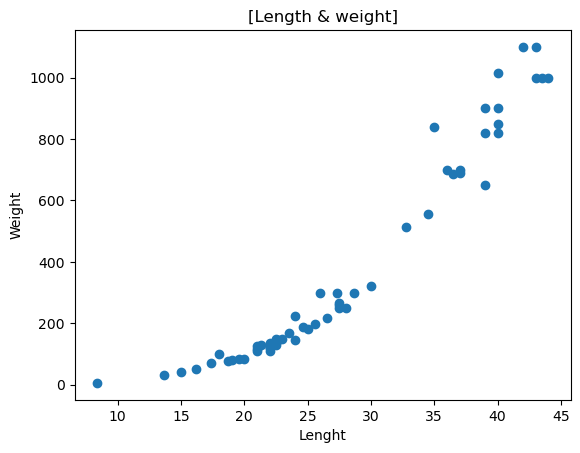

In [263]:
# 시각화
# 1번 컬럼 => Weight, 2번 컬럼 => Length
plt.plot(fish_df[2],fish_df[1],'o')
plt.xlabel('Lenght')
plt.ylabel('Weight')
plt.title('[Length & weight]')
plt.show()

# 탐색적 분석 결과
	* 길이가 비슷하면 무게도 비슷함
	* 비슷한 데이터 끼리 모여 있음
	* 알고리즘 : 최근접이웃 회귀 진행

[3] 데이터 셋 준비 <hr>
	* 피쳐와 타겟 분리
	* 학습용/검증용/테스트용 데이터셋 분리 => 학습용과 테스트용으로만 분리

In [264]:
# [3-1] 피쳐와 타겟 분리
feature_df = fish_df[fish_df.columns[-1:]]
target_df = fish_df[fish_df.columns[0]]

print(f'feature_df => {feature_df.ndim}D, ftarget_df,  {target_df.ndim}D')

feature_df => 2D, ftarget_df,  1D


In [265]:
# [3-2] 데이터세 분리 => 학습용 : 테스트용 = 75%:25%

train_data, test_data, train_label, test_label = train_test_split(feature_df,target_df, random_state=10)

print(f'train_data => {train_data.shape},   train_label => { train_label.shape}')
print(f'test_data => {test_data.shape},  test_label => {test_label.shape}')

train_data => (42, 1),   train_label => (42,)
test_data => (15, 1),  test_label => (15,)


In [266]:
# 인덱스 리셋
train_data.reset_index(drop=True, inplace=True)
train_label.reset_index(drop=True, inplace=True)


# 인덱스 리셋
test_data.reset_index(drop=True, inplace=True)
test_label.reset_index(drop=True, inplace=True)

print(train_data.index, train_label.index)
print(test_data.index, test_label.index)

RangeIndex(start=0, stop=42, step=1) RangeIndex(start=0, stop=42, step=1)
RangeIndex(start=0, stop=15, step=1) RangeIndex(start=0, stop=15, step=1)


In [267]:
train_data.head(), train_label.head()

(      2
 0  18.0
 1  37.0
 2  43.0
 3  39.0
 4  20.0,
 0     100.0
 1     700.0
 2    1100.0
 3     900.0
 4      85.0
 Name: 1, dtype: float64)

In [268]:
## 모듈로딩

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import root_mean_squared_error, mean_squared_error

In [269]:
# [4-1] 알고리즘 객체 생성
model = KNeighborsRegressor()


In [270]:
#[4-2] 학습 => 학습용 데이터셋 사용 : 규칙/패턴 X  즉, 모델 없음
model.fit(train_data,train_label)

KNeighborsRegressor()

In [271]:
# => fit 후 학습데이터 확인
print(model.n_features_in_)
print(model.n_samples_fit_)
#print(model.feature_names_in_)
print(model.effective_metric_)

1
42
euclidean


In [272]:
# [4-3] 훈련데이터셋으로 예측  => predict(2D_피쳐데이터)
model.predict(train_data)

array([  77.3 ,  761.  , 1040.  ,  841.  ,  104.  ,  659.  ,  897.  ,
        123.  ,   77.3 ,   61.48,  113.  ,  841.  ,  126.  ,  272.4 ,
        897.  ,  123.  ,  659.  ,   77.3 ,  113.  ,  118.  ,  841.  ,
        272.4 ,  157.  ,  113.  ,  696.2 ,  123.  , 1040.  ,  696.2 ,
        696.2 , 1040.  , 1040.  ,   84.  , 1004.  ,  897.  ,  240.4 ,
        183.4 ,  214.4 ,  897.  ,  248.4 ,  123.  ,  272.4 ,   98.  ])

In [273]:
train_data.index[:3]

RangeIndex(start=0, stop=3, step=1)

In [274]:
# [4-3] 훈련데이터셋으로 예측  => predict(2D_피쳐데이터)
# 생성 길이에 대한 무게 예측 결과
pre_weight = model.predict(train_data.iloc[:3])
pre_weight

array([  77.3,  761. , 1040. ])

In [275]:
# [4-3] 훈련데이터셋으로 예측  => predict(2D_피쳐데이터)
# 생성 길이에 대한 무게 예측 결과
pre_weight = model.predict(train_data)
pre_weight

array([  77.3 ,  761.  , 1040.  ,  841.  ,  104.  ,  659.  ,  897.  ,
        123.  ,   77.3 ,   61.48,  113.  ,  841.  ,  126.  ,  272.4 ,
        897.  ,  123.  ,  659.  ,   77.3 ,  113.  ,  118.  ,  841.  ,
        272.4 ,  157.  ,  113.  ,  696.2 ,  123.  , 1040.  ,  696.2 ,
        696.2 , 1040.  , 1040.  ,   84.  , 1004.  ,  897.  ,  240.4 ,
        183.4 ,  214.4 ,  897.  ,  248.4 ,  123.  ,  272.4 ,   98.  ])

In [276]:
train_label[:3]

0     100.0
1     700.0
2    1100.0
Name: 1, dtype: float64

[모델 성능 평가] 

In [277]:
## 모델 성능 평가 =>  score(2d_피쳐, 1D_타겟) : 모델 적합도
score = model.score(train_data, train_label)

score

# 손실 계산 평가 => rmse, mse, mae... (1D_타겟, 1D_예측값)
rmse = root_mean_squared_error(train_label, pre_weight)
print(f'[TRAIN] score => {score} rmse => {rmse}' ) 


[TRAIN] score => 0.9732268012442881 rmse => 60.02638237435587


In [ ]:
# [4-4] 테스트데이터셋 으로 예측 

# 
pre_weight = model.predict(test_data)
# 모델 성능 평가 => score()
score = model.score(test_data, test_label)
# 손실 계산 평가 => rmse, mse, mae... (1D_타겟, 1D_예측값)
rmse = root_mean_squared_error(test_label, pre_weight)
print(f'[TEST] score => {score} rmse => {rmse}' ) 


[TEST] score => 0.963783934800023 rmse => 29.07113161425494


[5] 최근접이웃 알고리즘의 동작원리 확인 <hr>
- k개만큼 가까이 있는 데이터를 추출
- 회귀 => K 개의 값을 모두 더한 후 평균

In [279]:
# - 데이터 저장
train_data.iloc[0], train_label[0]

(2    18.0
 Name: 0, dtype: float64,
 np.float64(100.0))

In [280]:
train_data.head(1),train_label.head(1)

(      2
 0  18.0,
 0    100.0
 Name: 1, dtype: float64)

In [281]:
# 이웃 찾기 : kneighbora  (2D)
disance, indices = model.kneighbors([[19.0]])


# -19.0 데이터랑 거리가 가까운 k개 즉, 5개 데이터의 인덱스
print(f'distance => {disance} \n indices => {indices}')

# => 이웃 데이터 인덱스 2D ==> 1D
label_idx = indices.reshape(-1)
data_idx = indices

print(f'label_idx  {label_idx },data_idx  {data_idx }')

distance => [[0.  0.6 1.  1.  1.6]] 
 indices => [[31 41  4  0 17]]
label_idx  [31 41  4  0 17],data_idx  [[31 41  4  0 17]]


In [282]:
# => 이웃 데이터의 길이와 무게 값 추출
train_data.iloc[label_idx], train_label[label_idx]

(       2
 31  19.0
 41  19.6
 4   20.0
 0   18.0
 17  17.4,
 31     80.0
 41     85.0
 4      85.0
 0     100.0
 17     70.0
 Name: 1, dtype: float64)

In [283]:
train_label.iloc[label_idx]


31     80.0
41     85.0
4      85.0
0     100.0
17     70.0
Name: 1, dtype: float64

In [284]:
indices = indices.reshape(-1)

In [285]:
train_label[indices], train_data.iloc[[0,1]]

(31     80.0
 41     85.0
 4      85.0
 0     100.0
 17     70.0
 Name: 1, dtype: float64,
       2
 0  18.0
 1  37.0)

In [286]:
indices.reshape(-1,1)

array([[31],
       [41],
       [ 4],
       [ 0],
       [17]])

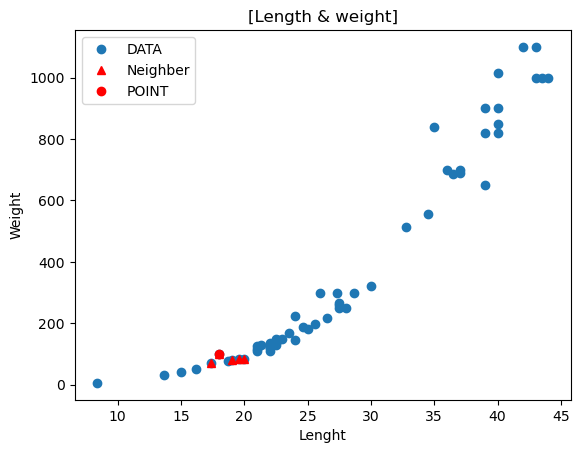

In [287]:
# 시각화  => 
# 1번 컬럼 => Weight, 2번 컬럼 => Length
plt.plot(fish_df[2],fish_df[1],'o', label='DATA')


plt.plot(train_data.iloc[label_idx] , train_label.iloc[label_idx],'r^', label = 'Neighber')
plt.plot(train_data.iloc[0], train_label[0],'ro', label = 'POINT')

plt.xlabel('Lenght')
plt.ylabel('Weight')
plt.title('[Length & weight]')
plt.legend()
plt.show()

In [288]:
# 데이터 지정

print( train_data.iloc[0])
print( train_data.iloc[1])

2    18.0
Name: 0, dtype: float64
2    37.0
Name: 1, dtype: float64


In [289]:
# 예측값 : K개 즉, 5개 이웃 데이터의 무게 Weight를 평균 낸 것으로 예측값 반환 
train_label[ label_idx ].mean()

print(f'길이 19.0 생선의 무게는 {pre_weight} 로 예측됩니다.')

길이 19.0 생선의 무게는 [248.4   77.3  272.4  214.4  126.   123.   761.    61.48 136.   183.4
 272.4  335.8  126.   272.4   84.  ] 로 예측됩니다.


In [290]:
# 
pre_weight = model.predict([[19.0]])

print(f'길이 19.0 생선의 무게는 {pre_weight} 로 예측됩니다.')

길이 19.0 생선의 무게는 [84.] 로 예측됩니다.


[6] 최적의 k 찾기 <hr>
- 최근접 이웃 갯수 => K
- 기본값 : 5
- 나의 데이터에 최적인 k 찾기
	* 1 ~ 전체데이터 수만큼 k값 변경한 KNR 인스턴스 생성
	* 학습,예측, 성능평가, 비용계산 결과 비교
	* 성능평가 높고, 비용계산 낮은 K 결정

In [291]:
datanums = train_data.shape[0]

# k 갯수에 따른 모델 성능 과 비용 함수값 저장
# HISTORYS = [[],[]] #  [ score_list , rmse_list ] 
HISTORYS = {'score':[], 'rmse':[]}

# k 갯수에 따른 모델 성능 및 비용 계산
for k in range(1, datanums+1):
	# KNR 인스턴스 생성
	model = KNeighborsRegressor(n_neighbors=k)
	# KNR 학습 및 예측 
	model.fit(train_data, train_label)
	pre_ = model.predict(train_data)
	
	# KNR 성능평가 및 비용계산 
	score =  model.score(train_data,train_label)
	rmse = root_mean_squared_error(train_label, pre_)


	# 저장
	HISTORYS['score'].append(score)
	HISTORYS['rmse'].append(rmse)
	print(score)

0.9778103352618532
0.9771710230238212
0.9768523688134045
0.9767030199069813
0.9732268012442881
0.972297133856694
0.9698226996769107
0.9719458395434867
0.9715808021969745
0.9642857084027222
0.9593829503182941
0.9557893062259528
0.9526445120080917
0.9470921688448841
0.942361959951946
0.9406127048622176
0.9300095292639539
0.9200986854687825
0.9109705019169935
0.9001202514671586
0.8873027953781766
0.8703527886672852
0.848822261212601
0.8263671636807902
0.803338247040258
0.7715857754658833
0.7387724361305661
0.7014772059212638
0.6632220878405533
0.6256691479892811
0.5866771786316181
0.5423000976051829
0.49487509105578054
0.44653738180166436
0.3965052003330837
0.3440781686563642
0.29278294303219554
0.23264948608973035
0.17613681954871163
0.11330079522483794
0.056182561142903986
0.0


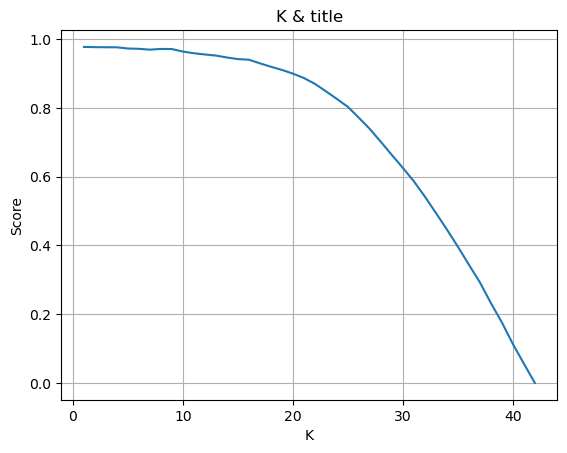

In [292]:
plt.plot(range(1,datanums+1), HISTORYS['score'])
plt.xlabel('K')
plt.ylabel('Score')
plt.title('K & title')
plt.grid()
plt.show()

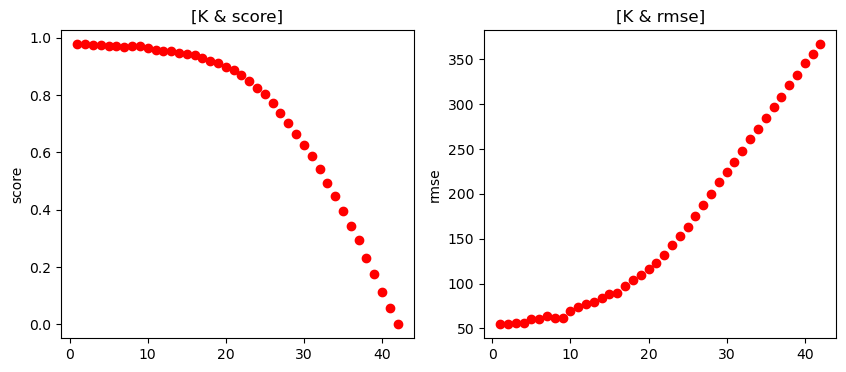

In [293]:
fig, axes = plt.subplots(1,2, figsize=(10,4))
axes = axes.flatten()
for ax, ylabel in zip(axes, ['score','rmse']):
	ax.plot(range(1,datanums+1), HISTORYS[ylabel], 'ro')
	ax.set_ylabel(ylabel)
	ax.set_title(f'[K & {ylabel}]')
plt.show()

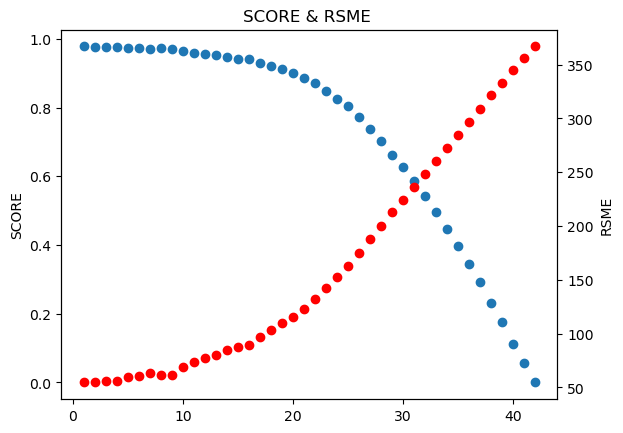

In [299]:
fig, axes1 = plt.subplots()
axes1.plot(range(1,datanums+1), HISTORYS['score'],'o', label= 'SCORE')
axes1.set_ylabel('SCORE')

axes2 = axes1.twinx()
axes2.plot(range(1,datanums+1), HISTORYS[ylabel], 'ro')
axes2.set_ylabel('RSME')
plt.title('SCORE & RSME ')
plt.show()

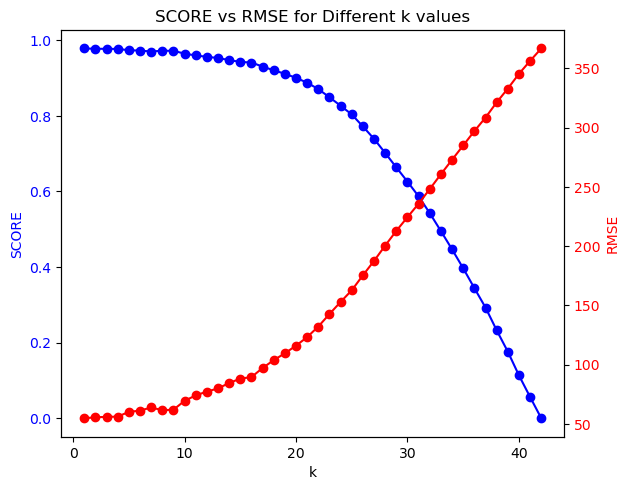

In [294]:
# 데이터 준비
x_values = range(1, datanums + 1)
score_values = HISTORYS['score']
rmse_values = HISTORYS['rmse']

# 첫 번째 y축: SCORE
fig, ax1 = plt.subplots()
ax1.plot(x_values, score_values, 'bo-', label='SCORE')
ax1.set_xlabel('k')  # x축 레이블
ax1.set_ylabel('SCORE', color='blue')  # 첫 번째 y축 레이블
ax1.tick_params(axis='y', labelcolor='blue')  # y축 색상

# 두 번째 y축: RMSE
ax2 = ax1.twinx()  # x축은 공유하고 y축은 독립적으로 설정
ax2.plot(x_values, rmse_values, 'ro-', label='RMSE')
ax2.set_ylabel('RMSE', color='red')  # 두 번째 y축 레이블
ax2.tick_params(axis='y', labelcolor='red')  # y축 색상

# 그래프 제목 및 범례 추가
fig.tight_layout()  # 그래프 간 여백 자동 조정
plt.title('SCORE vs RMSE for Different k values')
plt.show()
